In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import json
import os
import sys
sys.path.append("../../src")

from Evaluation import plot_accuracies_bar_plot, plot_accuracies_scatter_plot

In [26]:
path_reports = "../../results/without_augmentation"

In [27]:
path_train_individual_encoder = os.path.join(path_reports, 'train__Encoder_Encoder_Encoder_Encoder_Encoder_Encoder_Encoder_Encoder_Encoder_Encoder_11_datasets.csv')
path_train_individual_fcn = os.path.join(path_reports, 'train__FCN_FCN_FCN_FCN_FCN_FCN_FCN_FCN_FCN_FCN_11_datasets.csv')
path_train_individual_mlp = os.path.join(path_reports, 'train__MLP_MLP_MLP_MLP_MLP_MLP_MLP_MLP_MLP_MLP_11_datasets.csv')
path_train_individual_resnet = os.path.join(path_reports, 'train__Resnet_Resnet_Resnet_Resnet_Resnet_Resnet_Resnet_Resnet_Resnet_Resnet_11_datasets.csv')

In [28]:
df_train_individual_encoder = pd.read_csv(path_train_individual_encoder)
df_train_individual_fcn =pd.read_csv(path_train_individual_fcn)
df_train_individual_mlp =pd.read_csv(path_train_individual_mlp)
df_train_individual_resnet =pd.read_csv(path_train_individual_resnet)

In [32]:
path_train_encoder10 = os.path.join(path_reports, 'test_Encoder10.csv')
path_train_fcn10 = os.path.join(path_reports, 'test_FCN10.csv')
path_train_mlp10 = os.path.join(path_reports, 'test_MLP10.csv')
path_train_nne10 = os.path.join(path_reports, 'test_NNE.csv')
path_train_resnet10 = os.path.join(path_reports, 'test_Resnet10.csv')
path_train_MCDCNN_improved = os.path.join(path_reports, '../train__MCDCNN_improved_MCDCNN_improved_MCDCNN_improved_MCDCNN_improved_MCDCNN_improved_MCDCNN_improved_MCDCNN_improved_MCDCNN_improved_MCDCNN_improved_MCDCNN_improved_10_datasets.csv')
path_train_all_models = os.path.join(path_reports, 'all_ensembles_without_augmentation.csv')

In [33]:
df_train_encoder10 = pd.read_csv(path_train_encoder10)
df_train_fcn10 =pd.read_csv(path_train_fcn10)
df_train_mlp10 =pd.read_csv(path_train_mlp10)
df_train_nne =pd.read_csv(path_train_nne10)
df_train_resnet10 = pd.read_csv(path_train_resnet10)
df_train_MCDCNN_improved = pd.read_csv(path_train_MCDCNN_improved)
df_train_all_ensembles = pd.concat([df_train_encoder10, df_train_MCDCNN_improved, df_train_fcn10, df_train_mlp10, df_train_nne, df_train_resnet10, pd.read_csv(path_train_all_models)])

In [34]:
def group_df(df):
    return df.groupby(['model_name',], as_index=False)\
                .mean()[['model_name', 'test_acc']]\
                .sort_values(by=['test_acc'], ascending=False)\
                .rename(columns={"test_acc": "avg_test_acc"})

In [35]:
df_train_encoder10 = df_train_all_ensembles[df_train_all_ensembles["model_name"].str.contains("Encoder")]
df_train_fcn10 = df_train_all_ensembles[df_train_all_ensembles["model_name"].str.contains("FCN")]
df_train_mlp10 = df_train_all_ensembles[df_train_all_ensembles["model_name"].str.contains("MLP")]
df_train_resnet10 = df_train_all_ensembles[df_train_all_ensembles["model_name"].str.contains("Resnet")]
df_train_MCDCNN_improved = df_train_all_ensembles[df_train_all_ensembles["model_name"].str.contains("MCDCNN")]


/scratch/slurm_tmpdir/job_21782299/ipykernel_3189740/1901821924.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return df.groupby(['model_name',], as_index=False)\
/scratch/slurm_tmpdir/job_21782299/ipykernel_3189740/1901821924.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return df.groupby(['model_name',], as_index=False)\
/scratch/slurm_tmpdir/job_21782299/ipykernel_3189740/1901821924.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which shoul

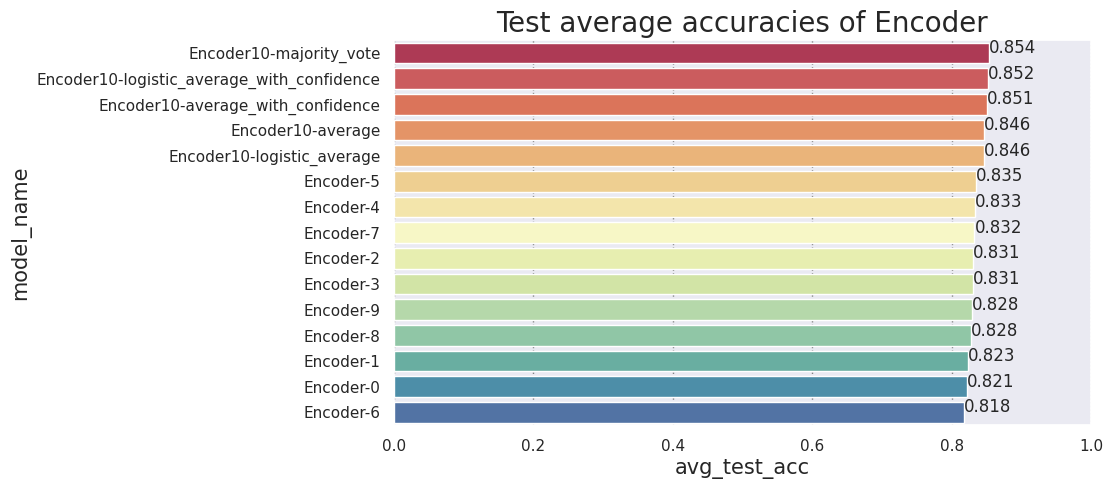

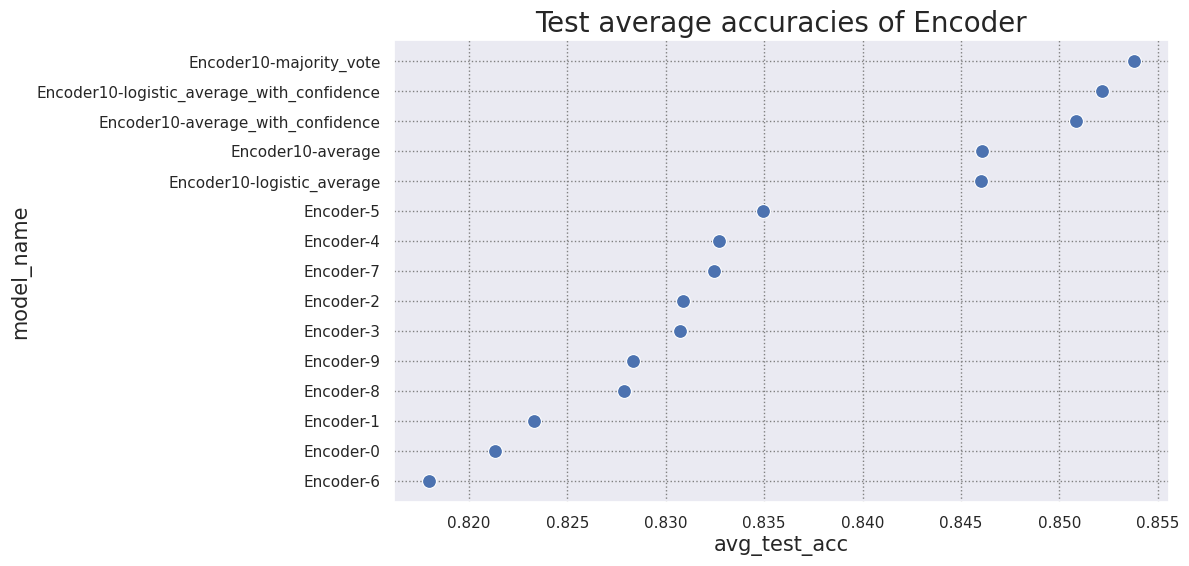

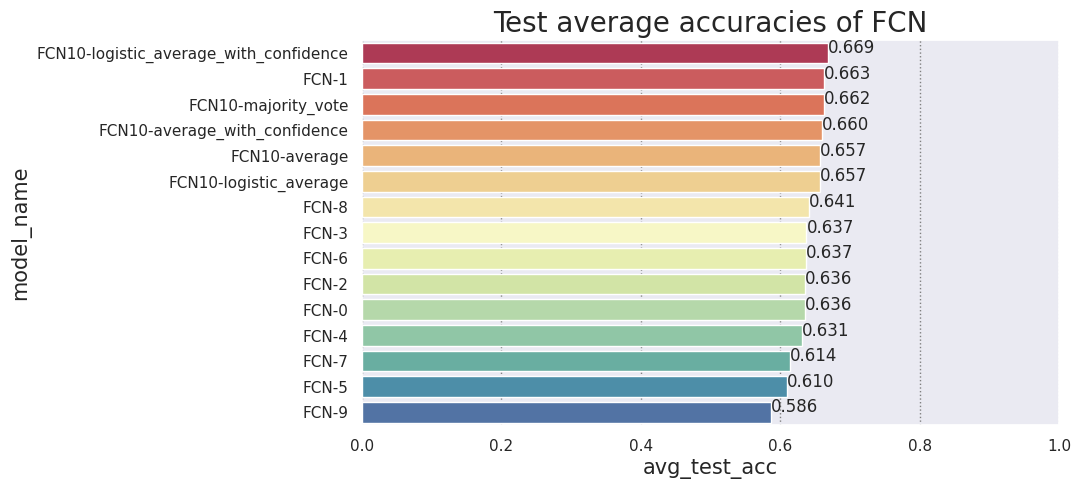

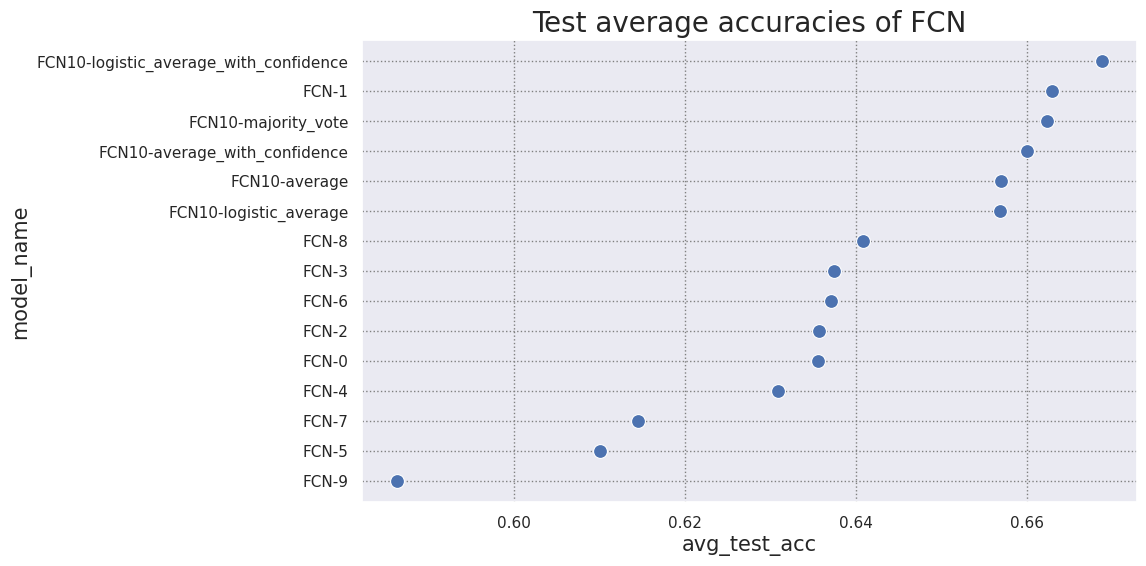

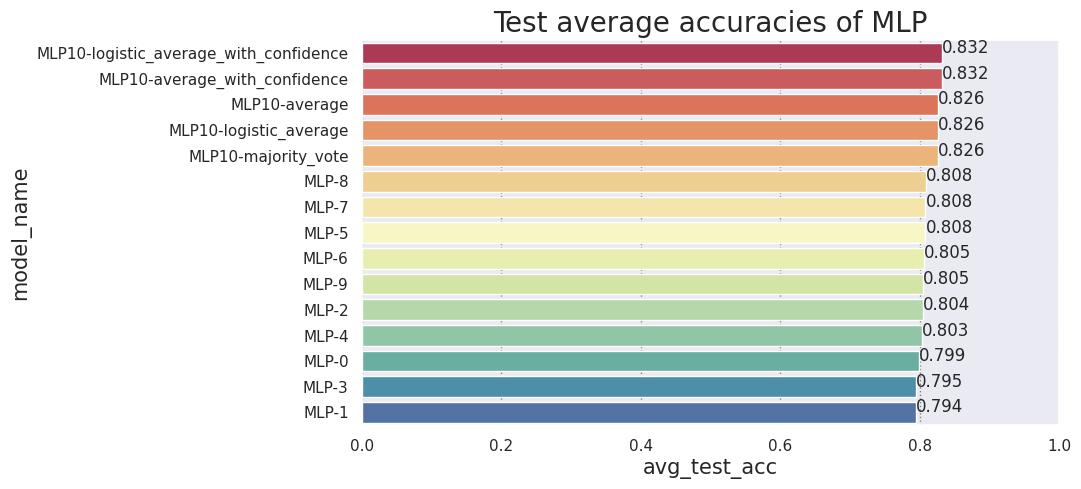

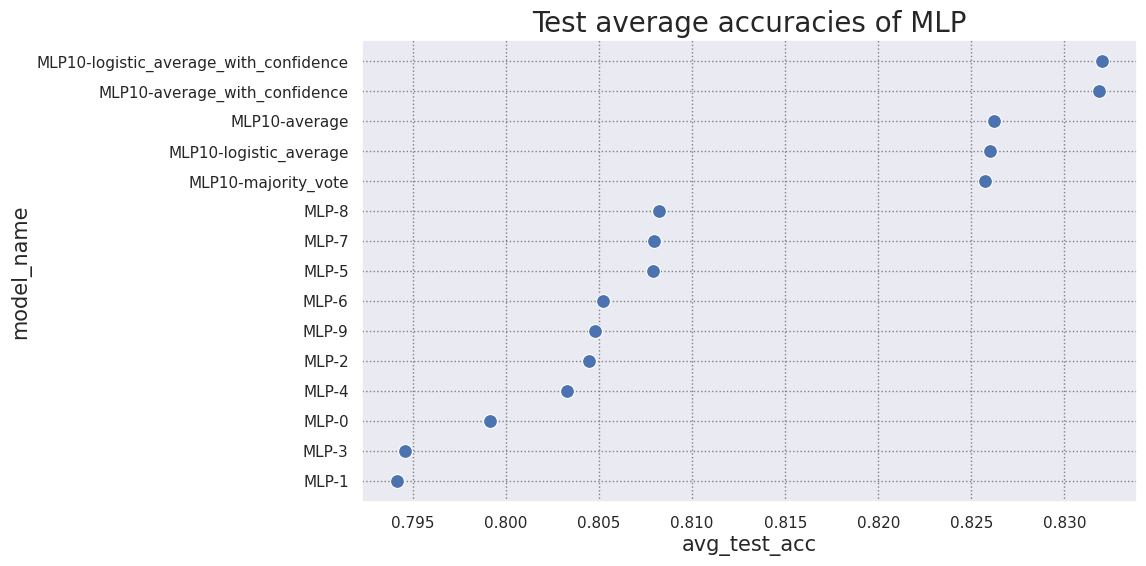

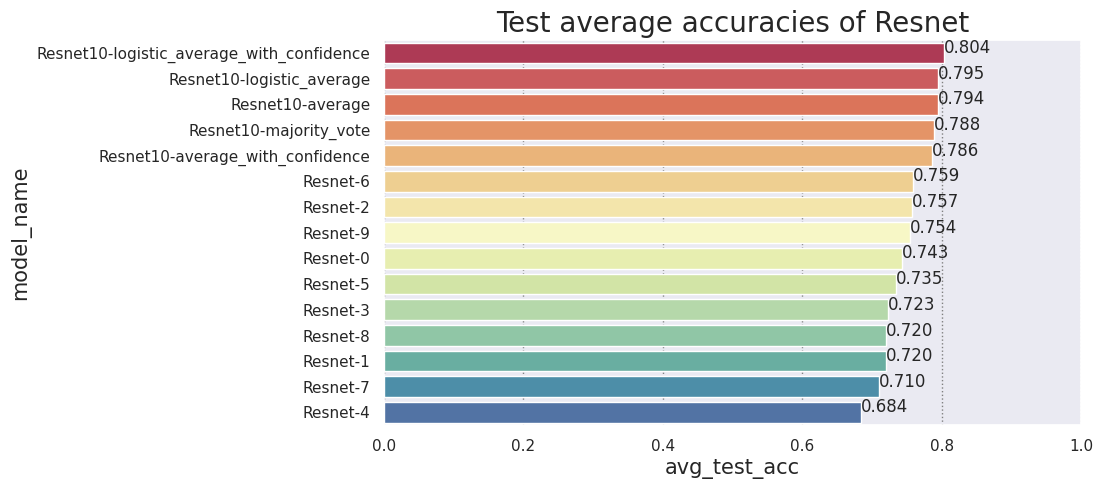

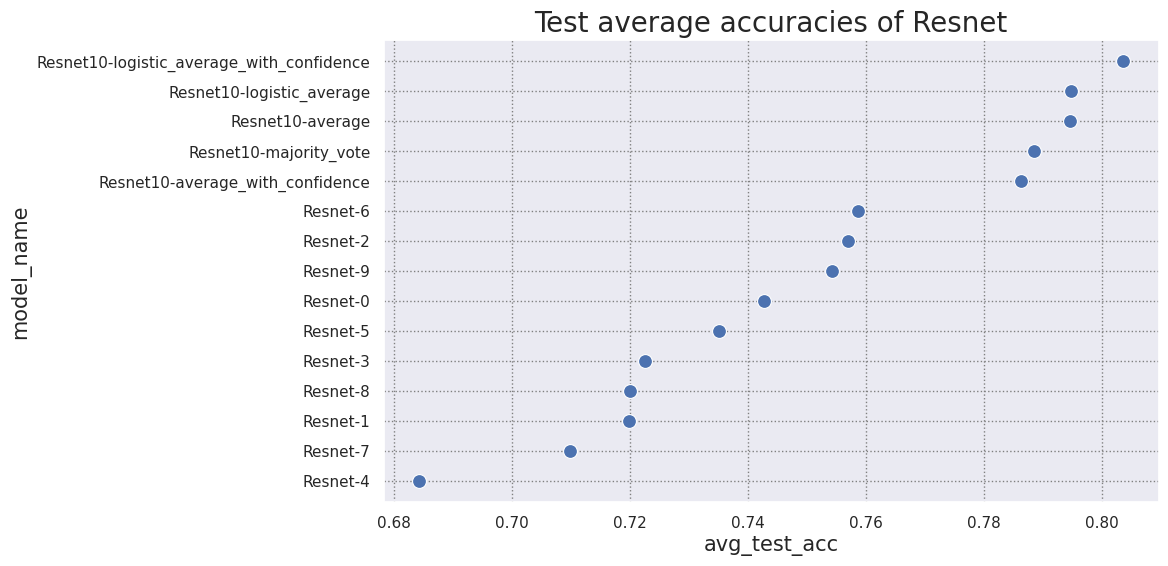

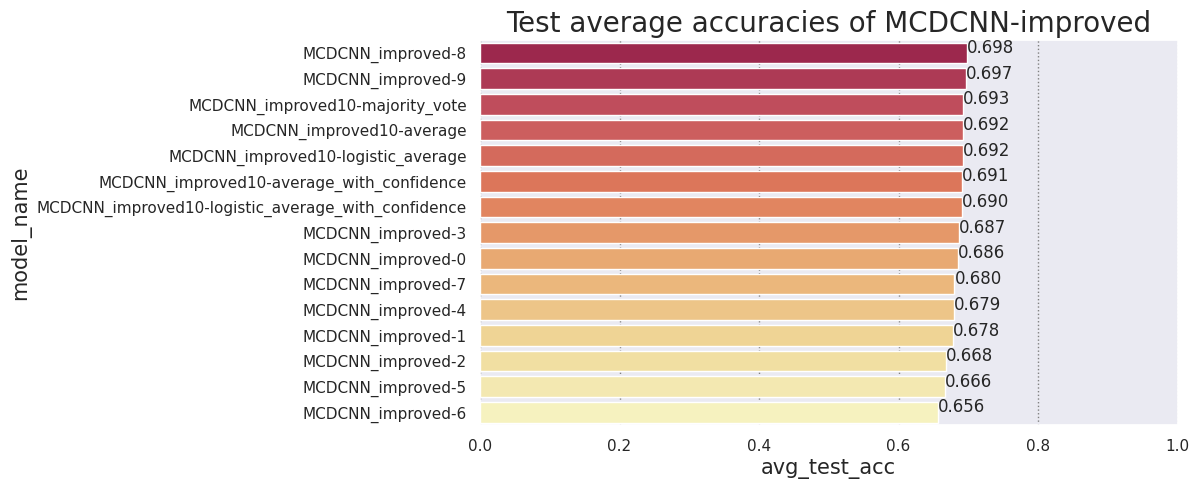

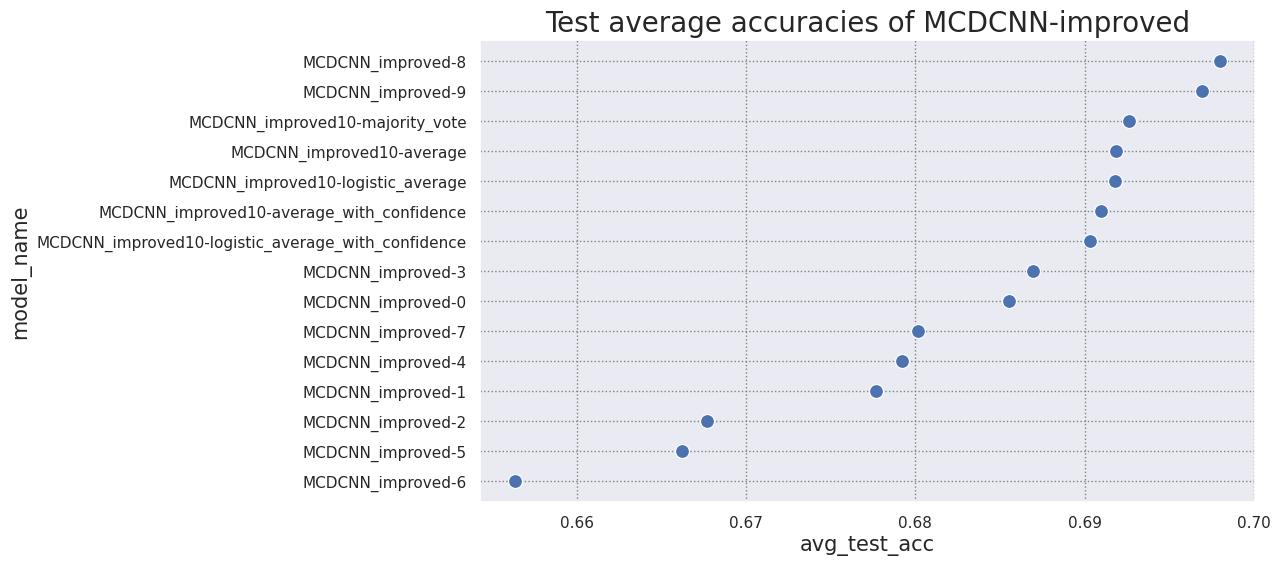

In [36]:
for train_individual, ensemble, name in \
        zip([df_train_individual_encoder, df_train_individual_fcn, df_train_individual_mlp, df_train_individual_resnet, df_train_MCDCNN_improved],\
            [df_train_encoder10, df_train_fcn10, df_train_mlp10, df_train_resnet10, df_train_MCDCNN_improved],\
            ["Encoder", "FCN", "MLP", "Resnet", "MCDCNN-improved"]):
    train_individual_grouped = group_df(train_individual)
    ensemble_grouped = group_df(ensemble)
    df_to_display = pd.concat([train_individual_grouped, ensemble_grouped])
    df_to_display = df_to_display.sort_values(by=['avg_test_acc'], ascending=False)
    plot_accuracies_bar_plot(df_to_display, title=f'Test average accuracies of {name}', figsize=(9,5))
    plot_accuracies_scatter_plot(df_to_display, title=f'Test average accuracies of {name}')